# Find the Spike Parameters
The method is based on the 2009, Biegler-König, Richard

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import datetime as datetime

In [2]:
data = pd.read_csv("../data/data_for_parm_estimation_short_series.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index(['date'], inplace=True)

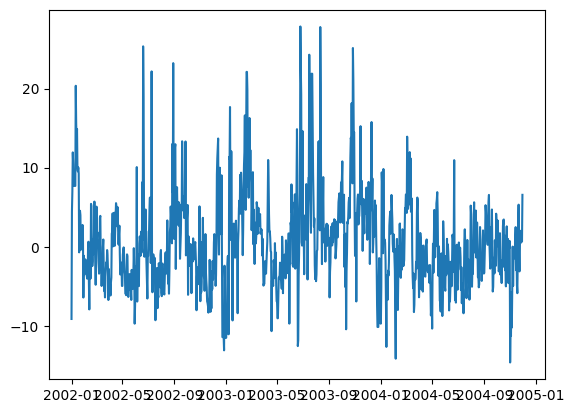

In [3]:
plt.plot(data['ou_estim_vec'])

In [4]:
def find_jump_param(spike_vec: pd.DataFrame
                    , resid_vec: pd.Series
                    , k_beta: float):

    proper_jump = pd.Series(0, index=spike_vec.index, dtype='float64')

    for i in range(1,proper_jump.shape[0]):
        if spike_vec[i] != 0:
            if spike_vec[i] > 0 and spike_vec[i] >= spike_vec[i-1]:
                proper_jump[i] = spike_vec[i]
            if spike_vec[i] < 0 and spike_vec[i] <= spike_vec[i-1]:
                proper_jump[i] = spike_vec[i]

    frequency = sum(proper_jump != 0)/len(proper_jump)
    prob_positive = sum(proper_jump > 0)/sum(proper_jump != 0)
    prob_negative =  1-prob_positive

    nu_positive = 1/proper_jump[proper_jump > 0].mean()
    nu_negative = -1/proper_jump[proper_jump < 0].mean()

    sd_resid = resid_vec.std()

    time_to_normalize = []
    # resid_array = (resid_vec-resid_vec.mean())/resid_vec.std()).abs().values
    resid_array = resid_vec.abs().values

    for index_i, properjump_i in enumerate(proper_jump):
        if properjump_i != 0:
            time_to_normalize.append((resid_array[index_i:]> sd_resid*k_beta).argmax())

    mean_rev_jump = 1/(sum(np.array(time_to_normalize))/len(proper_jump))

    dict_out = {'frequency': frequency
                , 'prob_positive': prob_positive
                , 'prob_negative': prob_negative
                , 'nu_positive': nu_positive
                , 'nu_negative': nu_negative
                , 'mean_rev_jump': mean_rev_jump
                , 'proper_jumps': proper_jump}

    return dict_out

In [5]:
dict_out = find_jump_param(data['spike_vec_w_sign'] 
                , data['ou_estim_vec']
                , 2)
dict_out

{'frequency': 0.024413145539906103,
 'prob_positive': 0.34615384615384615,
 'prob_negative': 0.6538461538461539,
 'nu_positive': 0.020015373534093116,
 'nu_negative': 0.0557837194720546,
 'mean_rev_jump': 1.09007164790174,
 'proper_jumps': date
 2002-01-01    0.0
 2002-01-02    0.0
 2002-01-03    0.0
 2002-01-04    0.0
 2002-01-05    0.0
              ... 
 2004-11-26    0.0
 2004-11-27    0.0
 2004-11-28    0.0
 2004-11-29    0.0
 2004-11-30    0.0
 Length: 1065, dtype: float64}

In [ ]:
1/0.024413145539906103